In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

In [2]:


# === Set the shared path and load data set ===
base_path = r'G:\csv_outputs'
df_combined = pd.read_csv(f"{base_path}\\Combined_4Condition_Cleaned.csv")

# === Optional: print shapes for quick verification ===
print(f"Combined shape: {df_combined.shape}")

Combined shape: (159, 62)


In [3]:
df_combined.head(5)

,Subject_ID,Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L,Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L,Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L,Rest_cingulum_ant_mid_pos_to_precuneus_R_L,Rest_cingulum_ant_mid_pos_to_SMA_R_L,Rest_Middle_frontal_R_L_to_occipital_sup_R_L,Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L,Rest_Middle_frontal_R_L_to_precuneus_R_L,Rest_Middle_frontal_R_L_to_SMA_R_L,...,SST_Stop_Middle_frontal_R_L_to_Precentral_MFG_R_L,SST_Stop_Middle_frontal_R_L_to_precuneus_R_L,SST_Stop_Middle_frontal_R_L_to_SMA_R_L,SST_Stop_occipital_sup_R_L_to_Precentral_MFG_R_L,SST_Stop_occipital_sup_R_L_to_precuneus_R_L,SST_Stop_occipital_sup_R_L_to_SMA_R_L,SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L,SST_Stop_Precentral_MFG_R_L_to_SMA_R_L,SST_Stop_precuneus_R_L_to_SMA_R_L,Label
0,1,0.014834,-0.336479,-0.027677,0.095930,0.310541,0.124793,1.091338,-0.033260,-0.095316,...,1.170319,0.049062,-0.059655,0.214845,0.125462,-0.699487,-0.089129,0.276727,-0.268441,0
1,2,0.224328,-0.207740,0.105979,0.182406,0.402633,-0.193574,0.856011,0.166000,0.032188,...,0.691951,0.023209,-0.150087,-0.154228,0.228777,0.127418,0.228602,0.198429,0.043162,0
2,3,-0.096183,-0.234593,-0.196171,0.192215,0.224086,-0.007425,0.861975,-0.141263,0.214659,...,1.750895,-0.313144,0.298938,0.407614,-0.014526,0.317849,-0.231258,0.476005,0.103781,0
3,4,0.197552,-0.102718,0.098043,0.307917,0.196048,-0.212539,0.891392,-0.098651,0.204031,...,1.038488,0.097237,0.045666,-0.069983,0.414711,-0.083123,0.237377,0.517069,0.119239,0
4,5,0.041581,-0.205092,-0.171112,0.617818,-0.032995,0.241889,1.020725,0.386042,-0.160685,...,1.256165,-0.291213,-0.104330,-0.368432,0.362466,-0.289908,-0.247124,0.047685,-0.010366,0


# EDA

In [17]:
df_combined.describe()

,Subject_ID,Rest_cingulum_ant_mid_pos_to_Middle_frontal_R_L,Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L,Rest_cingulum_ant_mid_pos_to_Precentral_MFG_R_L,Rest_cingulum_ant_mid_pos_to_precuneus_R_L,Rest_cingulum_ant_mid_pos_to_SMA_R_L,Rest_Middle_frontal_R_L_to_occipital_sup_R_L,Rest_Middle_frontal_R_L_to_Precentral_MFG_R_L,Rest_Middle_frontal_R_L_to_precuneus_R_L,Rest_Middle_frontal_R_L_to_SMA_R_L,...,SST_Stop_Middle_frontal_R_L_to_Precentral_MFG_R_L,SST_Stop_Middle_frontal_R_L_to_precuneus_R_L,SST_Stop_Middle_frontal_R_L_to_SMA_R_L,SST_Stop_occipital_sup_R_L_to_Precentral_MFG_R_L,SST_Stop_occipital_sup_R_L_to_precuneus_R_L,SST_Stop_occipital_sup_R_L_to_SMA_R_L,SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L,SST_Stop_Precentral_MFG_R_L_to_SMA_R_L,SST_Stop_precuneus_R_L_to_SMA_R_L,Label
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,80.245283,0.178417,-0.096393,0.116430,0.430035,0.179424,-0.045021,1.068922,0.072945,0.053729,...,1.142440,0.026239,0.079736,0.123715,0.284253,0.025725,0.015610,0.407859,-0.110774,0.245283
std,46.366006,0.241933,0.232118,0.261790,0.243194,0.243022,0.230798,0.291383,0.245396,0.240451,...,0.304441,0.272208,0.310504,0.242289,0.280717,0.284076,0.266163,0.310849,0.292649,0.431614
min,1.000000,-0.339926,-0.741227,-0.482969,-0.274196,-0.482313,-0.663899,0.315086,-0.709423,-0.622174,...,0.312346,-0.887154,-0.682023,-0.483342,-0.398736,-0.736846,-0.651890,-0.598641,-0.815856,0.000000
25%,40.500000,0.013254,-0.241332,-0.081351,0.241707,-0.015692,-0.195767,0.889357,-0.073179,-0.126868,...,0.945040,-0.150197,-0.129652,-0.044612,0.110025,-0.181402,-0.176675,0.202340,-0.340113,0.000000
50%,80.000000,0.161645,-0.116012,0.105979,0.426904,0.184550,-0.045948,1.091338,0.061280,0.047189,...,1.133006,0.035101,0.056108,0.117458,0.279699,0.047503,0.030315,0.405490,-0.137468,0.000000
75%,119.500000,0.317303,0.039244,0.284033,0.585443,0.357439,0.109852,1.279235,0.211499,0.204439,...,1.337159,0.190835,0.283990,0.301208,0.456299,0.217697,0.211102,0.591455,0.110274,0.000000
max,160.000000,1.190063,0.478740,1.144611,1.021436,0.716859,0.666447,1.704574,0.642311,0.745518,...,2.075642,0.657842,1.193166,0.763293,0.967661,0.799849,0.706408,1.591803,0.588383,1.000000


In [4]:
df_combined['Label'].value_counts()

Label
0    120
1     39
Name: count, dtype: int64

In [5]:
df_combined.isnull().sum().sum()

0

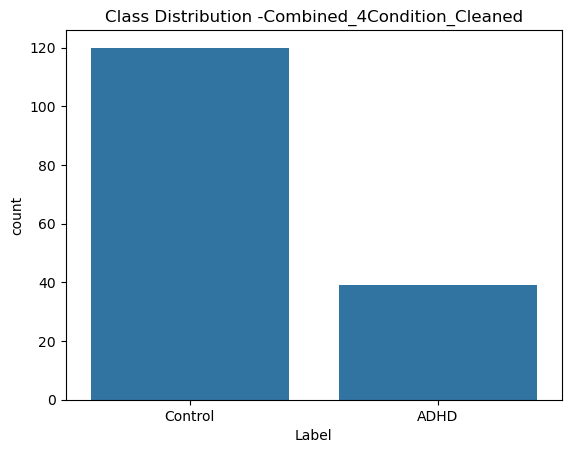

In [6]:
# Class distribution plot
sns.countplot(x='Label', data=df_combined)
plt.title(f'Class Distribution -Combined_4Condition_Cleaned')
plt.xticks([0, 1], ['Control', 'ADHD'])
plt.show()

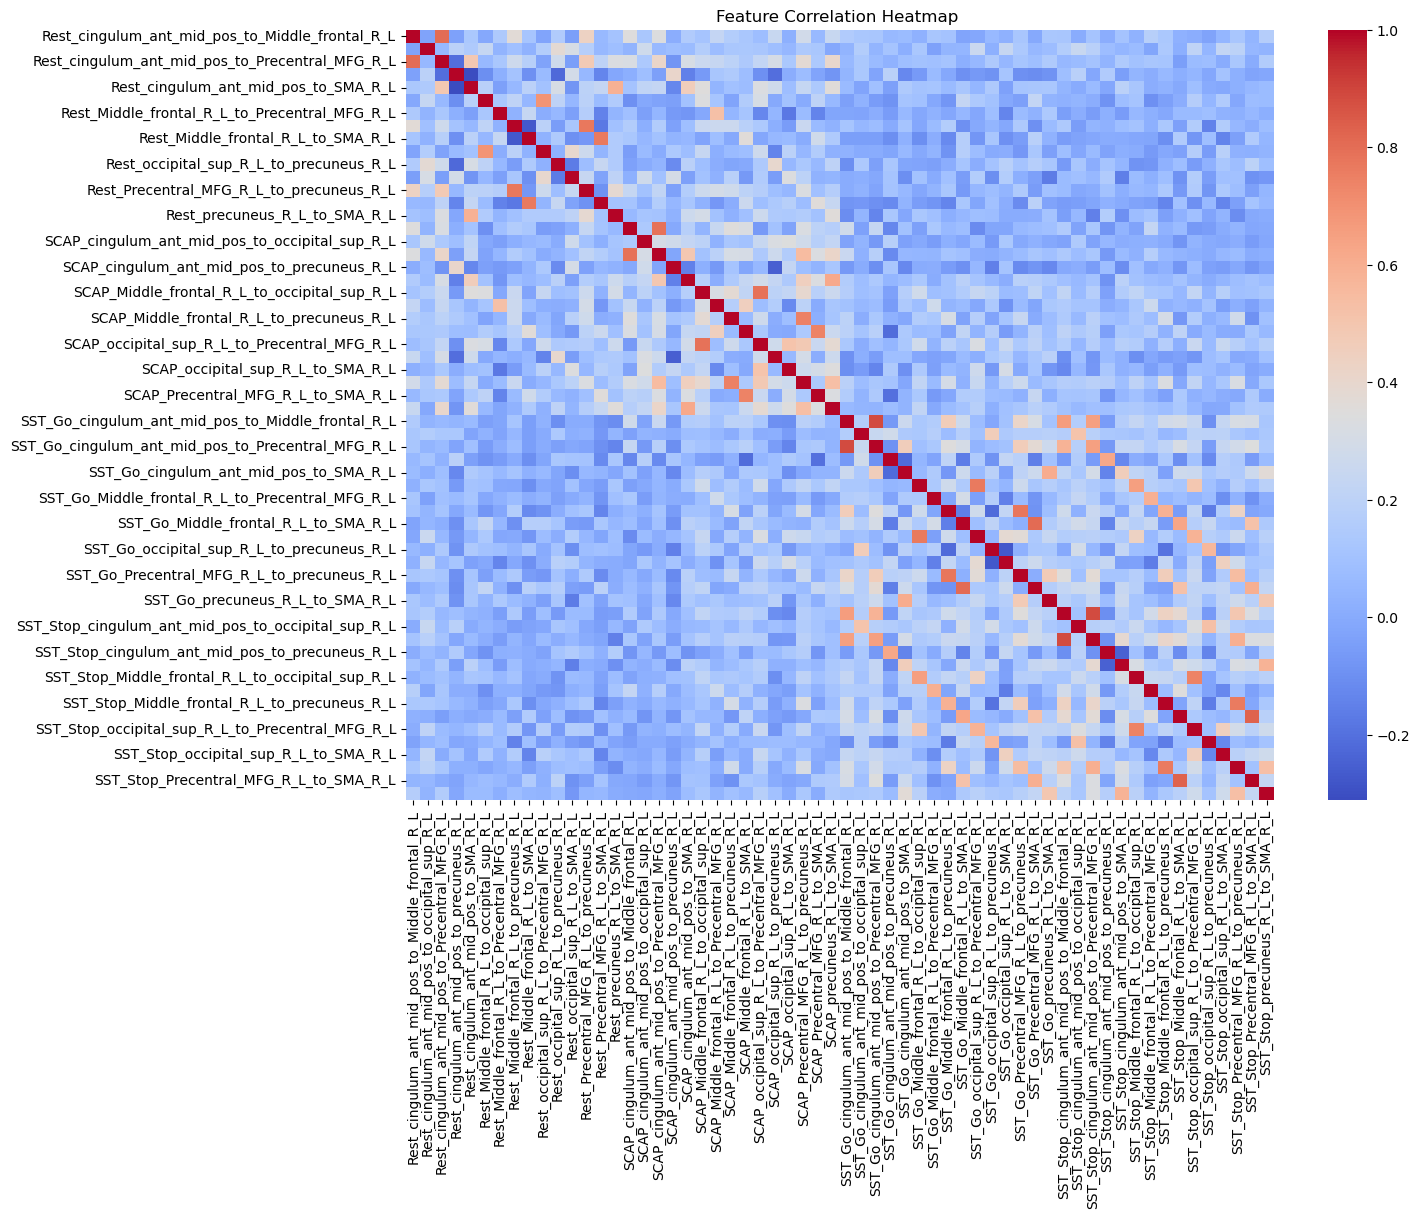

In [7]:
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
plt.figure(figsize=(14, 10))
sns.heatmap(df_combined[feature_cols].corr(), cmap='coolwarm')
plt.title(f'Feature Correlation Heatmap ')
plt.show()

In [8]:


# === LOAD DATA ===

df_combined['Label'] = df_combined['Label'].map({0: 'Control', 1: 'ADHD'})

# === FEATURES ===
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
control_df = df_combined[df_combined['Label'] == 'Control']
adhd_df = df_combined[df_combined['Label'] == 'ADHD']

# === BUILD PLOT ===
fig = make_subplots(rows=1, cols=2, subplot_titles=["", ""])

for i, feature in enumerate(feature_cols):
    x_control = control_df[feature].dropna()
    x_adhd = adhd_df[feature].dropna()

    # Shared bins and KDE x-axis for consistent range
    x_range = np.linspace(min(x_control.min(), x_adhd.min()), max(x_control.max(), x_adhd.max()), 200)

    # Control KDE (scaled)
    kde_ctrl = gaussian_kde(x_control)
    kde_ctrl_y = kde_ctrl(x_range) * len(x_control) * (x_control.max() - x_control.min()) / 30  # match histogram scale

    # ADHD KDE (scaled)
    kde_adhd = gaussian_kde(x_adhd)
    kde_adhd_y = kde_adhd(x_range) * len(x_adhd) * (x_adhd.max() - x_adhd.min()) / 30

    # Histogram bin width based on data range
    bin_width = (x_range.max() - x_range.min()) / 30

    fig.add_trace(go.Histogram(
        x=x_control,
        name='Control',
        xaxis='x1',
        yaxis='y1',
        marker_color='blue',
        nbinsx=30,
        opacity=0.6,
        visible=(i == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_ctrl_y,
        mode='lines',
        line=dict(color='blue', dash='dot'),
        name='Control KDE',
        visible=(i == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Histogram(
        x=x_adhd,
        name='ADHD',
        xaxis='x2',
        yaxis='y2',
        marker_color='red',
        nbinsx=30,
        opacity=0.6,
        visible=(i == 0),
        showlegend=False
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        x=x_range,
        y=kde_adhd_y,
        mode='lines',
        line=dict(color='red', dash='dot'),
        name='ADHD KDE',
        visible=(i == 0),
        showlegend=False
    ), row=1, col=2)

# === DROPDOWN MENU ===
buttons = []
for i, feature in enumerate(feature_cols):
    vis = [False] * (4 * len(feature_cols))
    vis[i*4 + 0] = True  # hist control
    vis[i*4 + 1] = True  # kde control
    vis[i*4 + 2] = True  # hist adhd
    vis[i*4 + 3] = True  # kde adhd

    # Compute stats
    mc, sc = control_df[feature].mean(), control_df[feature].std()
    ma, sa = adhd_df[feature].mean(), adhd_df[feature].std()
    title_texts = [
        f"Control — {feature}<br>Mean = {mc:.2f}, Std = {sc:.2f}",
        f"ADHD — {feature}<br>Mean = {ma:.2f}, Std = {sa:.2f}"
    ]

    buttons.append(dict(
    label=feature,
    method='update',
    args=[
        {'visible': vis},
        {'title': f'Feature: {feature}',
         'annotations': [
             dict(
                 text=f"<b>Control</b><br>Mean = {mc:.2f}<br>Std = {sc:.2f}",
                 x=0.15, y=1.08, xref='paper', yref='paper',
                 showarrow=False, font=dict(size=12), align='left'
             ),
             dict(
                 text=f"<b>ADHD</b><br>Mean = {ma:.2f}<br>Std = {sa:.2f}",
                 x=0.85, y=1.08, xref='paper', yref='paper',
                 showarrow=False, font=dict(size=12), align='right'
             )
         ]}
    ]
))


# === LAYOUT ===
fig.update_layout(
    height=600, width=1000,
    title='Interactive Feature Histogram & KDE: Control vs ADHD',
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        x=1.05, xanchor='left',
        y=1.15, yanchor='top',
        showactive=True
    )],
    bargap=0.1
)

fig.show()


In [9]:

# === Load preloaded DataFrame ===
# === Setup ===
feature_cols = [col for col in df_combined.columns if col not in ['Subject_ID', 'Label']]
control_df = df_combined[df_combined['Label'] == 'Control']
adhd_df = df_combined[df_combined['Label'] == 'ADHD']

# === Initialize Figure ===
fig = make_subplots(rows=1, cols=2, subplot_titles=["", ""])

trace_count = 0
valid_features = []

# === Add Box Plots ===
for feature in feature_cols:
    x_control = control_df[feature].dropna()
    x_adhd = adhd_df[feature].dropna()

    if len(x_control) < 2 or len(x_adhd) < 2:
        continue

    valid_features.append(feature)

    fig.add_trace(go.Box(
        y=x_control, name='Control', marker_color='blue',
        boxmean=True, visible=(trace_count == 0),
        showlegend=False
    ), row=1, col=1)

    fig.add_trace(go.Box(
        y=x_adhd, name='ADHD', marker_color='red',
        boxmean=True, visible=(trace_count == 0),
        showlegend=False
    ), row=1, col=2)

    trace_count += 1

# === Dropdown Buttons ===
buttons = []
for i, feature in enumerate(valid_features):
    vis = [False] * (2 * len(valid_features))
    vis[i*2 + 0] = True
    vis[i*2 + 1] = True

    mc, sc = control_df[feature].mean(), control_df[feature].std()
    ma, sa = adhd_df[feature].mean(), adhd_df[feature].std()

    buttons.append(dict(
        label=feature,
        method='update',
        args=[
            {'visible': vis},
            {'title': f'Feature: {feature}',
             'annotations': [
                 dict(
                     text=f"<b>Control</b><br>Mean = {mc:.2f}<br>Std = {sc:.2f}",
                     x=0.15, y=1.08, xref='paper', yref='paper',
                     showarrow=False, font=dict(size=12), align='left'
                 ),
                 dict(
                     text=f"<b>ADHD</b><br>Mean = {ma:.2f}<br>Std = {sa:.2f}",
                     x=0.85, y=1.08, xref='paper', yref='paper',
                     showarrow=False, font=dict(size=12), align='right'
                 )
             ]}
        ]
    ))

# === Layout ===
fig.update_layout(
    height=600, width=1000,
    title='Interactive Box Plots: Control vs ADHD',
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        x=1.05, xanchor='left',
        y=1.15, yanchor='top',
        showactive=True
    )]
)

fig.show()
df_combined['Label'] = df_combined['Label'].replace({'Control': 0, 'ADHD': 1})


C:\Users\Saye\AppData\Local\Temp\ipykernel_14188\1903918462.py:82: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Train_Test split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# === STEP 1: Prepare features and labels ===
X = df_combined.drop(columns=['Subject_ID', 'Label'])
y = df_combined['Label']
subject_ids = df_combined['Subject_ID']

# === STEP 2: Train-test split (keep test untouched)
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y, subject_ids, test_size=0.2, stratify=y, random_state=42
)

# === STEP 3A: StandardScaler (for classical ML)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

df_train_std = pd.concat([ids_train.reset_index(drop=True), y_train.reset_index(drop=True), 
                          pd.DataFrame(X_train_std, columns=X.columns)], axis=1)

df_test_std = pd.concat([ids_test.reset_index(drop=True), y_test.reset_index(drop=True), 
                         pd.DataFrame(X_test_std, columns=X.columns)], axis=1)

# === STEP 3B: MinMaxScaler (for neural networks)
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

df_train_mm = pd.concat([ids_train.reset_index(drop=True), y_train.reset_index(drop=True), 
                         pd.DataFrame(X_train_mm, columns=X.columns)], axis=1)

df_test_mm = pd.concat([ids_test.reset_index(drop=True), y_test.reset_index(drop=True), 
                        pd.DataFrame(X_test_mm, columns=X.columns)], axis=1)


In [11]:
df_train_std.shape

(127, 62)

# Feature Selection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# === SETUP ===
X_train_fs = df_train_std.drop(columns=['Subject_ID', 'Label'])  # feature selection on train only
y_train_fs = df_train_std['Label']
feature_names = X_train_fs.columns

# === 1. SelectKBest: ANOVA F-test ===
skb_anova = SelectKBest(score_func=f_classif, k='all')
skb_anova.fit(X_train_fs, y_train_fs)
anova_scores = skb_anova.scores_

# === 2. SelectKBest: Mutual Info ===
skb_mi = SelectKBest(score_func=mutual_info_classif, k='all')
skb_mi.fit(X_train_fs, y_train_fs)
mi_scores = skb_mi.scores_

# === 3. Recursive Feature Elimination (RFE) ===
rfe_model = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe_model.fit(X_train_fs, y_train_fs)
rfe_ranks = ~rfe_model.support_  # False = selected → 0

# === 4. Random Forest Feature Importances ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fs, y_train_fs)
rf_scores = rf.feature_importances_

# === Create Comparison Table ===
scores_df = pd.DataFrame({
    'Feature': feature_names,
    'ANOVA_F': anova_scores,
    'Mutual_Info': mi_scores,
    'RF_Importance': rf_scores,
    'RFE_Rank': rfe_ranks.astype(int)
}).sort_values(by='RF_Importance', ascending=False).reset_index(drop=True)

# === Top Features ===
top_anova = scores_df.nlargest(20, 'ANOVA_F')['Feature'].tolist()
top_mi = scores_df.nlargest(20, 'Mutual_Info')['Feature'].tolist()
top_rf = scores_df.nlargest(20, 'RF_Importance')['Feature'].tolist()
top_rfe = scores_df[scores_df['RFE_Rank'] == 0]['Feature'].tolist()

# === Output ===
print("🔥 Top 20 Features by ANOVA:\n", top_anova)
print("\n🔍 Top 20 Features by Mutual Info:\n", top_mi)
print("\n🌲 Top 20 Features by Random Forest:\n", top_rf)
print("\n🧹 Top Features selected by RFE:\n", top_rfe)


🔥 Top 20 Features by ANOVA:
 ['Rest_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SST_Stop_cingulum_ant_mid_pos_to_SMA_R_L', 'SST_Stop_cingulum_ant_mid_pos_to_precuneus_R_L', 'SST_Stop_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SCAP_cingulum_ant_mid_pos_to_precuneus_R_L', 'SST_Go_precuneus_R_L_to_SMA_R_L', 'SST_Go_cingulum_ant_mid_pos_to_precuneus_R_L', 'SST_Stop_Precentral_MFG_R_L_to_precuneus_R_L', 'SST_Stop_Middle_frontal_R_L_to_precuneus_R_L', 'SST_Go_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SST_Stop_precuneus_R_L_to_SMA_R_L', 'SCAP_precuneus_R_L_to_SMA_R_L', 'SCAP_cingulum_ant_mid_pos_to_occipital_sup_R_L', 'SCAP_occipital_sup_R_L_to_Precentral_MFG_R_L', 'SCAP_cingulum_ant_mid_pos_to_SMA_R_L', 'SST_Go_Middle_frontal_R_L_to_SMA_R_L', 'Rest_cingulum_ant_mid_pos_to_precuneus_R_L', 'SCAP_Precentral_MFG_R_L_to_SMA_R_L', 'Rest_occipital_sup_R_L_to_SMA_R_L', 'SCAP_occipital_sup_R_L_to_SMA_R_L']

🔍 Top 20 Features by Mutual Info:
 ['SST_Go_Precentral_MFG_R_L_to_SMA_R_L', 'SST_Stop_ci